### Importing the Necessary Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from PIL import Image 

### Concatenating the data sets from 14 different hip-hop artists

In [2]:
df1 = pd.read_csv("Tupac-Shakur.csv")
df2 = pd.read_csv("Tupac.csv")
df2['artist'] =df2['artist'].astype(str)+'-Shakur'
df2 = df2.iloc[1: , :]
df3 = pd.read_csv("Xzibit.csv")
df4 = pd.read_csv("Ice-Cube.csv")
df5 = pd.read_csv("Eazy-E.csv")
df6 = pd.read_csv("Dr-Dre.csv")
df7 = pd.read_csv("Eminem.csv")
df8 = pd.read_csv("Nate-Dogg.csv")
df9 = pd.read_csv("Snoop-Dogg.csv")
df10 = pd.read_csv("Kendrick-Lamar.csv")
df11 = pd.read_csv("BIG.csv")
df12 = pd.read_csv("JAY-Z.csv")
df13 = pd.read_csv("50-Cent.csv")
df14 = pd.read_csv("Lloyd-Banks.csv")

In [3]:
Data = pd.concat([df1,df2,df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

### EDA

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  276 non-null    int64 
 1   artist      276 non-null    object
 2   song        276 non-null    object
 3   lyrics      276 non-null    object
 4   genre       276 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.9+ KB


In [5]:
Data.isnull().sum()

Unnamed: 0    0
artist        0
song          0
lyrics        0
genre         0
dtype: int64

In [6]:
Data=Data.drop_duplicates(subset=None, keep='first', inplace=False)

In [7]:
Data= Data[Data["song"].str.contains("%")==False]

In [8]:
Data.head()

,Unnamed: 0,artist,song,lyrics,genre
0,0,Tupac-Shakur,Static-Mix-Part-2,Static is the last thing ya need when ya see m...,hiphop/rap
1,9,Tupac-Shakur,Me-and-My-Homies,Me and my homies tho You know we kick it like ...,hiphop/rap
2,14,Tupac-Shakur,Never-Be-Beat,Never Be Beat Tupac Shakur Fumble suckers tumb...,hiphop/rap
3,20,Tupac-Shakur,The-Case-of-the-Misplaced-Mic-II,They finally did it (what′s that?) They stole ...,hiphop/rap
1,5,Tupac-Shakur,Fatha-Figga,Album: Miscellaneous Genre: Hip Hop/Rap RIFF-i...,hiphop/rap


In [9]:
Data.reset_index(drop=True, inplace=True)

In [10]:
Data.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [11]:
Data.head()

,artist,song,lyrics,genre
0,Tupac-Shakur,Static-Mix-Part-2,Static is the last thing ya need when ya see m...,hiphop/rap
1,Tupac-Shakur,Me-and-My-Homies,Me and my homies tho You know we kick it like ...,hiphop/rap
2,Tupac-Shakur,Never-Be-Beat,Never Be Beat Tupac Shakur Fumble suckers tumb...,hiphop/rap
3,Tupac-Shakur,The-Case-of-the-Misplaced-Mic-II,They finally did it (what′s that?) They stole ...,hiphop/rap
4,Tupac-Shakur,Fatha-Figga,Album: Miscellaneous Genre: Hip Hop/Rap RIFF-i...,hiphop/rap


### Count of Lyrics 

In [12]:
#get lyric frequencies for each song
Data['lyric_count'] = Data['lyrics'].map(lambda x: len(x.split()))
Data.head()
Data.to_csv('Data.csv')

### Most Common words in all the lyrics 

In [13]:
import spacy
from spacy.lang.en.examples import sentences 
from spacy.lang.en import English


### Convert a collection of text documents to a matrix of token counts.
source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 


def mostcommon(data,additional_stopwords = [],token=1):
    
    #add any new stop words to default stopword list
    add_stop_words = ENGLISH_STOP_WORDS.union(additional_stopwords)

    #instantiate count vectorizer and specify tokens
    vect = CountVectorizer(stop_words=add_stop_words, ngram_range= (token,token))

    #fit vectorizer
    X = vect.fit_transform(data)
    
    #get word counts as DataFrame
    word_counts = pd.DataFrame(np.asarray(X.sum(axis=0))[0],vect.get_feature_names(),columns=['count'])
    
    #sort by count
    word_counts = word_counts.sort_values(by='count', ascending=False)

    return word_counts #return DataFrame

In [15]:
#call the function 
most_common_word = mostcommon(Data.lyrics,token=1)

In [16]:
most_common_word.to_csv('most_common.csv')

### Using word cloud for the visual representation of lyrics 
source: https://www.datacamp.com/community/tutorials/wordcloud-python

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
Data = Data.replace(to_replace =["nigga"], 
                            value ="n....")

In [19]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('nigga', 'NI...'))

In [20]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('Nigga', 'NI...'))

In [21]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('bitch', 'BI...'))

In [22]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('fuck', 'FU...'))

In [23]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('Fuck', 'FU...'))

In [24]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('shit', 'SH...'))

In [25]:
Data['lyrics']= Data['lyrics'].apply(lambda x:x.replace('Shit', 'SH...'))

In [26]:
lyrics = Data["lyrics"].tolist()

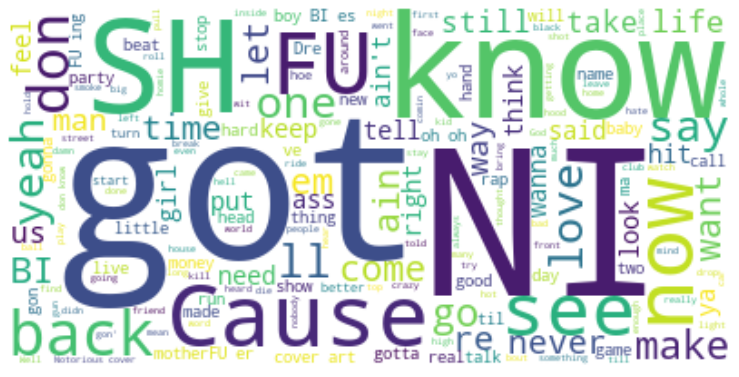

In [27]:
wordcloud = WordCloud(background_color="white", max_words=len(lyrics), min_word_length = 2)

wordcloud.generate(str(lyrics))

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
# making costum frame for the cloud 
costum_mask = np.array(Image.open("rapper_3.png")) 

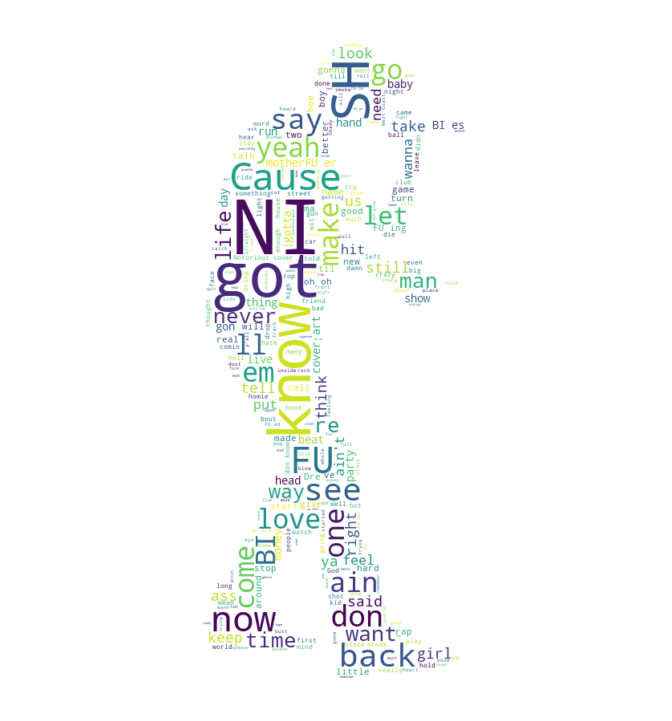

In [29]:
wordcloud = WordCloud(background_color="white", max_words=len(lyrics), min_word_length = 2, mask = costum_mask)

wordcloud.generate(str(lyrics))

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(Data["lyrics"])
X

<273x9765 sparse matrix of type '<class 'numpy.int64'>'
	with 71246 stored elements in Compressed Sparse Row format>

In [31]:
count = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

### The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.
Source: https://tfhub.dev/google/universal-sentence-encoder/4

In [32]:
#get universal sentence encoder
import tensorflow_hub as hub
USE = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [33]:
def getUSEEmbed(_string,USE = USE):
    return np.array(USE([_string])[0])

In [34]:
#get USE embeddings for each song
df_embed = pd.DataFrame([getUSEEmbed(Data.lyrics[i]) for i in range(Data.shape[0])],\
                        index=[Data.song[i] for i in range(Data.shape[0])])

In [35]:
df_embed.head(5)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Static-Mix-Part-2,0.014024,-0.032626,0.066712,0.016492,0.054475,-0.049457,0.046598,-0.056751,-0.066372,0.042904,...,-0.006136,-0.066692,-0.062858,0.005385,-0.010272,0.038099,0.001564,0.000054,-0.064711,-0.063887
Me-and-My-Homies,-0.002607,-0.049739,0.028712,0.018447,0.047016,0.028197,0.045001,-0.050123,-0.047974,0.038692,...,-0.010871,-0.066234,-0.057669,-0.020935,-0.056323,0.028313,-0.013884,-0.002541,-0.059210,-0.061539
Never-Be-Beat,-0.034558,-0.056501,0.056550,0.052587,0.051636,0.046167,0.056388,-0.048523,0.039949,0.038192,...,-0.056472,-0.056550,-0.045522,0.055758,-0.007418,-0.051621,-0.040022,-0.007548,-0.056437,-0.036974
The-Case-of-the-Misplaced-Mic-II,-0.058331,-0.039284,0.064862,0.039060,0.061812,-0.021715,0.064925,-0.017880,-0.010027,0.010656,...,-0.027673,-0.065436,-0.037304,0.001828,0.056604,-0.064961,-0.052194,-0.005342,-0.060105,0.008405
Fatha-Figga,-0.001350,-0.054662,0.059300,0.025154,0.004224,-0.032404,0.037400,-0.054766,-0.059290,-0.015583,...,0.026303,-0.059303,-0.057748,0.009884,0.021642,0.059177,0.023312,-0.038637,-0.058972,-0.059016


### Clustering the Lyrics 
According to the elbow method, 7 is a suitable number for K(Finding K at the end of the notebook)

In [36]:
kmeans=KMeans(n_clusters=7)

In [37]:
cluster=kmeans.fit(df_embed)

### Exploring Clusters 

In [38]:
cluster.cluster_centers_
with open('cluster_centers_.npy', 'wb') as f:
    np.save(f, cluster.cluster_centers_)

In [39]:
cluster.labels_

array([1, 1, 4, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4, 2, 0, 4,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 4, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 4, 4, 4, 1, 0, 4, 2, 4, 2, 2, 0, 0, 2, 3, 2, 3, 1, 1,
       4, 3, 1, 1, 3, 1, 1, 2, 4, 1, 4, 2, 3, 1, 3, 5, 1, 5, 1, 5, 3, 1,
       1, 1, 3, 1, 5, 5, 5, 5, 3, 4, 3, 4, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0,
       4, 0, 0, 1, 4, 2, 4, 4, 4, 4, 4, 2, 1, 2, 3, 0, 2, 0, 3, 0, 0, 1,
       6, 6, 0, 6, 4, 2, 6, 6, 0, 2, 0, 6, 3, 0, 3, 2, 1, 1, 0, 2, 2, 2,
       2, 2, 3, 4, 4, 1, 0, 4, 0, 3, 2, 3, 2, 3, 0, 2, 2, 3, 2, 2, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 3, 0, 4, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 0, 2, 2, 3, 3, 2, 3, 0, 2, 0, 0, 1, 1, 0, 3, 3, 3, 2, 1, 2, 0,
       3, 1, 1, 1, 3, 2, 1, 1, 1])

In [40]:
df_embed_c=df_embed.copy()

In [41]:
df_embed_c['cluster']=cluster.labels_

In [59]:
df_embed_c.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,cluster
Static-Mix-Part-2,0.014024,-0.032626,0.066712,0.016492,0.054475,-0.049457,0.046598,-0.056751,-0.066372,0.042904,...,-0.066692,-0.062858,0.005385,-0.010272,0.038099,0.001564,0.000054,-0.064711,-0.063887,1
Me-and-My-Homies,-0.002607,-0.049739,0.028712,0.018447,0.047016,0.028197,0.045001,-0.050123,-0.047974,0.038692,...,-0.066234,-0.057669,-0.020935,-0.056323,0.028313,-0.013884,-0.002541,-0.059210,-0.061539,1
Never-Be-Beat,-0.034558,-0.056501,0.056550,0.052587,0.051636,0.046167,0.056388,-0.048523,0.039949,0.038192,...,-0.056550,-0.045522,0.055758,-0.007418,-0.051621,-0.040022,-0.007548,-0.056437,-0.036974,4
The-Case-of-the-Misplaced-Mic-II,-0.058331,-0.039284,0.064862,0.039060,0.061812,-0.021715,0.064925,-0.017880,-0.010027,0.010656,...,-0.065436,-0.037304,0.001828,0.056604,-0.064961,-0.052194,-0.005342,-0.060105,0.008405,0
Fatha-Figga,-0.001350,-0.054662,0.059300,0.025154,0.004224,-0.032404,0.037400,-0.054766,-0.059290,-0.015583,...,-0.059303,-0.057748,0.009884,0.021642,0.059177,0.023312,-0.038637,-0.058972,-0.059016,1


In [43]:
df_embed_c.to_csv('ly_cluster.csv')

### Finding Optimal K 

### Silhouette Method

In [44]:
from sklearn.metrics import silhouette_score 

In [45]:
K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(df_embed)
    silhouettes.append(silhouette_score(df_embed, kmeans.predict(df_embed)))

Text(0, 0.5, 'silhouette score')

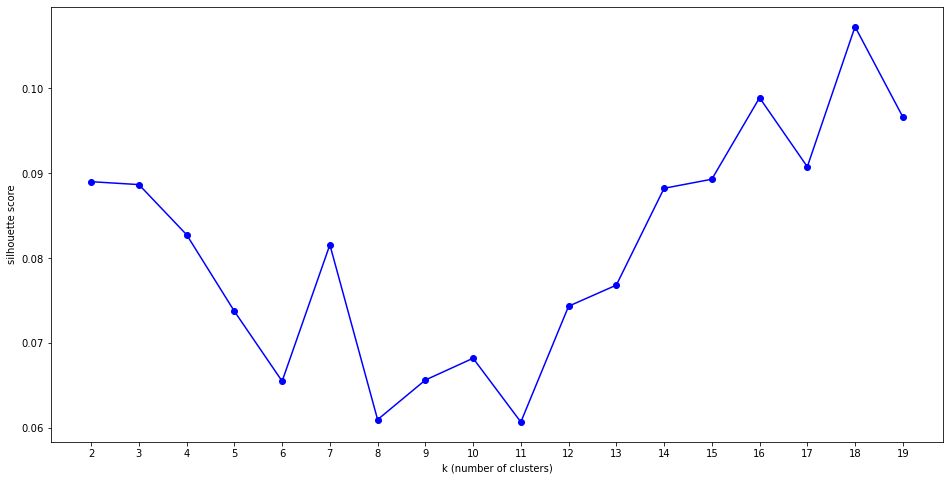

In [46]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

### Elbow Method

In [47]:
kmeans.inertia_

73.88701629638672

In [48]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df_embed)
print(kmeans.inertia_)

91.69174194335938


In [49]:
K= range(2,20)

In [50]:
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(df_embed)
    inertia.append(kmeans.inertia_)

print(inertia)

[103.04685974121094, 98.21653747558594, 94.20179748535156, 92.370849609375, 89.94844055175781, 88.48726654052734, 85.91706085205078, 84.0998306274414, 83.20089721679688, 81.72233581542969, 80.64167785644531, 79.96015930175781, 78.80047607421875, 77.41582489013672, 76.21568298339844, 75.46715545654297, 74.8586654663086, 73.88701629638672]


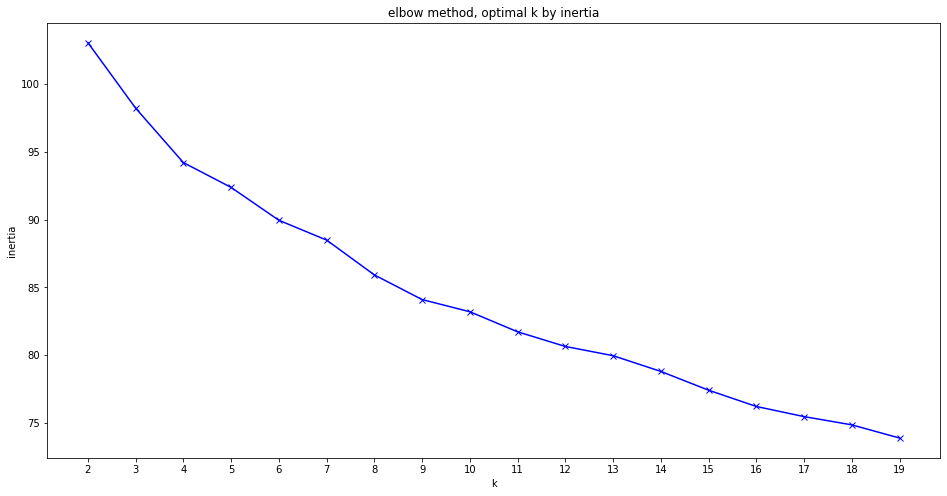

In [51]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

### Creating data frames for the recommender 

In [52]:
modified = df_embed_c.reset_index()

In [53]:
modified.rename({'index':'song'},axis = 1, inplace = True)

In [54]:
df_final = Data.merge(modified,on=['song'])


In [55]:
df_final = df_final.drop_duplicates(subset = 'song', keep = 'first')


In [56]:
df_final['song'] = df_final['song'].str.lower();


In [57]:
df_final['artist'] = df_final['artist'].str.lower();

In [58]:
df_final.to_csv('Data_project.csv')